# Programming Assignment 1

**1. Simple Function ** <br/> Make a 5 x 5 Identity Matrix**

In [1]:
import numpy as np
A = []
A = np.eye(5)
print A

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


**2. Linear regression with one variable** <br/> Plotting the Data

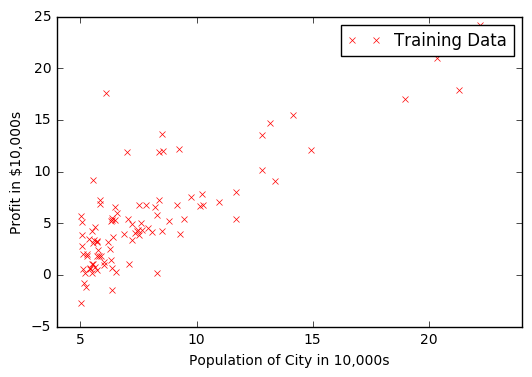

In [2]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt

#Get Data from Text
data_file = 'ex1/ex1data1.txt'
data = np.loadtxt(data_file, delimiter = ',')
#Column 1 row matrix
x = data[:,0]
#Column 2 row matrix
y = data[:,1]
#Number of training examples
m = data.shape[0]
#Creates change from row matrix to column matrix for y
y = y.reshape((-1,1))

#Plot the Data
plt.plot(x, y, 'rx', markersize = 5, label = 'Training Data')
#Uses Labels
plt.legend()
#Plot Range
plt.xlim(4, 24)
plt.ylim(-5, 25)
#Set Labels for X and Y
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
#Display the Plot
plt.show()

The objective of linear regression is to minimize the cost function

$$J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$h_{\theta}(x)=\theta^Tx=\theta_0+\theta_1x_1 $$

In [3]:
#Cost Function
def computeCost(X, y, theta):
    #Get # of training data
    m = y.shape[0]
    hypothesis = np.dot(X, theta)
    loss = hypothesis - y
    cost = np.sum(loss ** 2) / (2 * m)
    return cost

#Creates a Column of 1's in x
X = np.column_stack((np.ones(m), x))
#.zeroes = Return a new array of given shape and type, filled with zeros.
theta = np.zeros((2, 1))

#Compute the cost J(Theta)
print 'Computing the Cost of J(Theta): ', round(computeCost(X, y, theta), 2)

Computing the Cost of J(Theta):  32.07


**Gradient Descent** <br/> Fit the linear regression parameters $\theta$ to our dataset using Gradient Descent. <br/> The objective of linear regression is to minimize the cost function.

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$\theta_j-\alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$ 

(simultaneously update $\theta_j$ for all j)


Theta found by gradient descent: 
[[-3.63029144]
 [ 1.16636235]]


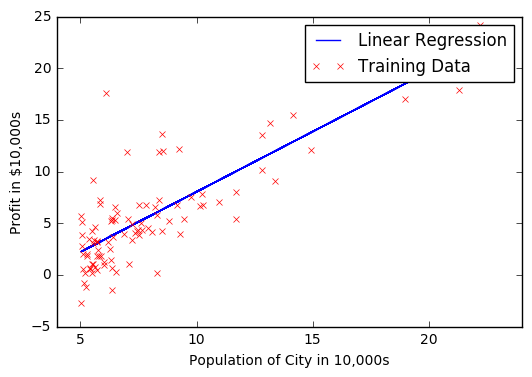

For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


In [4]:
def gradientDescent(X, y, theta, alpha, num_iters):
    #Get # of training data
    m = y.shape[0]
    for i in range(num_iters):
        hypothesis = np.dot(X, theta)
        loss = hypothesis - y
        #Average Gradient
        gradient = np.dot(np.transpose(X), loss) / m
        #Update
        theta = theta - alpha * gradient
    return theta

#Declare Variables
iterations = 1500
#Learning Rate
alpha = 0.01

#Minimize J(Theta)
theta = gradientDescent(X, y, theta, alpha, iterations)

#Plot Data with Linear Regression
plt.plot(X[:,1], np.dot(X,theta), '-', label = 'Linear Regression' )
plt.plot(x, y, 'rx', markersize = 5, label = 'Training Data')
#Uses Labels
plt.legend()
#Plot Range
plt.xlim(4, 24)
plt.ylim(-5, 25)
#Set Labels for X and Y
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
#Display the Plot
print 'Theta found by gradient descent: '
print theta
plt.show()

#Predictions
predict1 = np.dot([1, 3.5], theta)[0]
print('For population = 35,000, we predict a profit of %f' % (predict1 * 10000));
predict2 = np.dot([1, 7], theta)[0]
print('For population = 70,000, we predict a profit of %f' % (predict2 * 10000));

**Visualization of J($\theta$)**

Visualizing J(theta_0, theta_1) ...


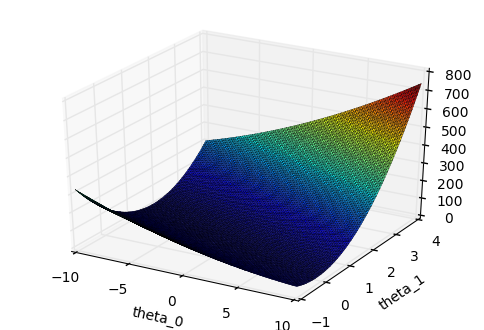

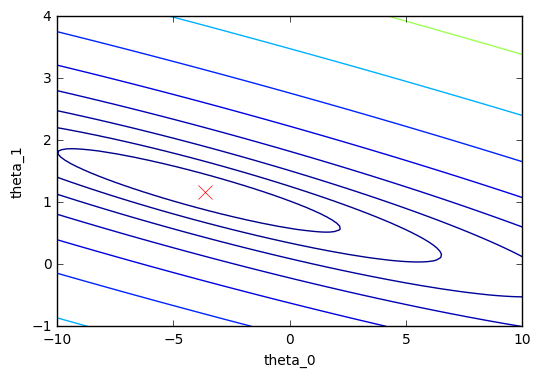

In [5]:
#Import Libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


print('Visualizing J(theta_0, theta_1) ...')

#Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

xv, yv = np.meshgrid(theta0_vals, theta1_vals)
theta_vals = np.column_stack((xv.ravel(), yv.ravel()))

#Fill out J_vals
J_vals = np.array([computeCost(X, y, t.reshape(-1, 1)) for t in theta_vals])

# Surface plot
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot_trisurf(theta_vals[:,0], theta_vals[:,1], J_vals, cmap = cm.jet, linewidth = 0.2)
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.show()

# Contour plot
plt.figure()
J_vals_contour = J_vals.reshape(-1, theta0_vals.shape[0])
plt.contour(xv, yv, J_vals_contour, np.logspace(-2, 3, 20))
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta[0,0], theta[1,0], 'rx', markersize = 10, linewidth = 2);

plt.show()

*** 3. Linear Regression with Multiple Variables ***

In [6]:
#Get Data from Text
data_file = 'ex1/ex1data2.txt'
data = np.loadtxt(data_file, delimiter=',')
#Column 1 row matrix
X = data[:, 0: 2]
#Column 2 row matrix
y = data[:, 2]
#Number of training examples
m = data.shape[0]
#Creates change from row matrix to column matrix for y
y = y.reshape((-1,1))
print('First 10 examples from the dataset:')
print('%sSize %s# of Bedrooms %sPrice' % ('\t'*1, '\t'*2,'\t'*2))
print(data[0:11,:])

First 10 examples from the dataset:
	Size 		# of Bedrooms 		Price
[[  2.10400000e+03   3.00000000e+00   3.99900000e+05]
 [  1.60000000e+03   3.00000000e+00   3.29900000e+05]
 [  2.40000000e+03   3.00000000e+00   3.69000000e+05]
 [  1.41600000e+03   2.00000000e+00   2.32000000e+05]
 [  3.00000000e+03   4.00000000e+00   5.39900000e+05]
 [  1.98500000e+03   4.00000000e+00   2.99900000e+05]
 [  1.53400000e+03   3.00000000e+00   3.14900000e+05]
 [  1.42700000e+03   3.00000000e+00   1.98999000e+05]
 [  1.38000000e+03   3.00000000e+00   2.12000000e+05]
 [  1.49400000e+03   3.00000000e+00   2.42500000e+05]
 [  1.94000000e+03   4.00000000e+00   2.39999000e+05]]


***Normalize the Features***

In [7]:
def featureNormalize(X):
    X_norm = X
    mu = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    # ============= YOUR CODE HERE =============
    # Instructions: First, for each feature dimension, compute the mean
    #               of the feature and subtract it from the dataset,
    #               storing the mean value in mu. Next, compute the 
    #               standard deviation of each feature and divide
    #               each feature by it's standard deviation, storing
    #               the standard deviation in sigma. 
    #Mean of the Features
    mu = np.mean(X, axis=0)
    #Standard Deviation of each Feature
    sigma = np.std(X, axis=0)
    #Normalized
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

print "Normalizing Features"
X, mu, sigma = featureNormalize(X)
X = np.column_stack((np.ones(m), X))
print X

Normalizing Features
[[  1.00000000e+00   1.31415422e-01  -2.26093368e-01]
 [  1.00000000e+00  -5.09640698e-01  -2.26093368e-01]
 [  1.00000000e+00   5.07908699e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.43677059e-01  -1.55439190e+00]
 [  1.00000000e+00   1.27107075e+00   1.10220517e+00]
 [  1.00000000e+00  -1.99450507e-02   1.10220517e+00]
 [  1.00000000e+00  -5.93588523e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.29685755e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.89466782e-01  -2.26093368e-01]
 [  1.00000000e+00  -6.44465993e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.71822042e-02   1.10220517e+00]
 [  1.00000000e+00  -8.65999486e-04  -2.26093368e-01]
 [  1.00000000e+00  -1.40779041e-01  -2.26093368e-01]
 [  1.00000000e+00   3.15099326e+00   2.43050370e+00]
 [  1.00000000e+00  -9.31923697e-01  -2.26093368e-01]
 [  1.00000000e+00   3.80715024e-01   1.10220517e+00]
 [  1.00000000e+00  -8.65782986e-01  -1.55439190e+00]
 [  1.00000000e+00  -9.72625673e-01  -2.26093368e-01]
 [  1.0

**Solving using Gradient Descent**

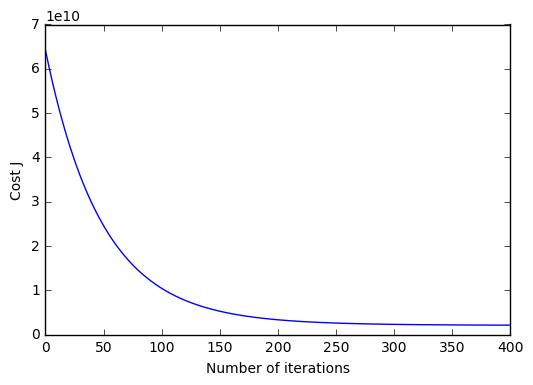

Theta computed from gradient descent:
[[ 334302.06399328]
 [  99411.44947359]
 [   3267.01285407]]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 289221.547371


In [8]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    #Number of training examples
    m = y.shape[0]
    J_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        hypothesis = np.dot(X, theta)
        loss = hypothesis - y
        #Average Gradient
        gradient = np.dot(np.transpose(X), loss) / m
        #Update
        theta = theta - alpha * gradient
        J_history[i] = computeCost(X, y, theta)
    return theta, J_history

#Delclare Variables
iterations = 400
#Learning Rate
alpha = 0.01

theta = np.zeros((3,1))

theta, J_history = gradientDescentMulti(X, y, theta, alpha, iterations)
    
# Plot the convergence graph
plt.figure()
plt.plot(J_history, '-b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

# Display gradient descent's result
print('Theta computed from gradient descent:');
print(theta)

price = 0
#Prediction on 1650 sq ft House with 3 Bedrooms
x = np.array([1, 1650.0, 3.0])
x[1:3] = (x[1:3] - mu) / sigma
price = np.dot(x, theta)[0]
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n %f' % price)

**Solving using Normalization**

Closed-form solution to linear regression

$$\theta = (X^TX)^{-1}X^T\overrightarrow{y} $$

In [9]:
def normalEqn(X, y):
    theta = np.zeros((X.shape[1], 1))
    #Compute the (multiplicative) inverse of a matrix.
    matrix_inv = np.linalg.inv(np.dot(np.transpose(X), X))
    theta = np.dot(np.dot(matrix_inv, np.transpose(X)), y)
    return theta

#Reload data
data = np.loadtxt(data_file, delimiter=',')

X = data[:,0:2]
y = data[:,2]
m = data.shape[0] # number of training examples
#Change Y to Column Matrix
Y = y.reshape((-1,1))

X = np.column_stack((np.ones(m), X))
theta = normalEqn(X, Y)

price = 0
#Prediction on 1650 sq ft House with 3 Bedrooms
x = np.array([1, 1650.0, 3.0])
price = np.dot(x, theta)[0]
print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n %f' % price)

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 293081.464335
